In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/173.png
/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/491.png
/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/379.png
/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/248.png
/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/94.png
/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/480.png
/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/236.png
/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/340.png
/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/48.png
/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/513.png
/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/350.png
/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test/false/314.png
/kaggle/input/cardiomegaly-disease-predict

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow
import keras
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data_path = '/kaggle/input/cardiomegaly-disease-prediction-using-cnn/train/train'

filepaths =[]
labels = []

folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [4]:
train_df.head()

,filepaths,label
0,/kaggle/input/cardiomegaly-disease-prediction-...,false
1,/kaggle/input/cardiomegaly-disease-prediction-...,false
2,/kaggle/input/cardiomegaly-disease-prediction-...,false
3,/kaggle/input/cardiomegaly-disease-prediction-...,false
4,/kaggle/input/cardiomegaly-disease-prediction-...,false


In [5]:
test_data_path = '/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test'

filepaths =[]
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [6]:
test_df.head()

,filepaths,label
0,/kaggle/input/cardiomegaly-disease-prediction-...,false
1,/kaggle/input/cardiomegaly-disease-prediction-...,false
2,/kaggle/input/cardiomegaly-disease-prediction-...,false
3,/kaggle/input/cardiomegaly-disease-prediction-...,false
4,/kaggle/input/cardiomegaly-disease-prediction-...,false


In [7]:
encode = LabelEncoder()
train_df['label'] = encode.fit_transform(train_df['label'])
test_df['label'] = encode.fit_transform(test_df['label'])

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_df['label'] = train_df['label'].astype(str)
test_df['label'] = test_df['label'].astype(str)

In [10]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 4438 validated image filenames belonging to 2 classes.
Found 1114 validated image filenames belonging to 2 classes.


In [11]:
model = Sequential()

model.add(Conv2D(2**5, (3,3), padding='valid', strides = (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(2**5, (3,3), padding='valid', strides = (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(2**5, (3,3), padding='valid', strides = (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [12]:
history = model.fit(train_generator, epochs=5, batch_size=32, validation_data=test_generator)

Epoch 1/5


I0000 00:00:1726561001.271676      88 service.cc:145] XLA service 0x798d70004ca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726561001.271751      88 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726561001.271759      88 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/139 ━━━━━━━━━━━━━━━━━━━━ 14:55 6s/step - accuracy: 0.4062 - loss: 0.6953

I0000 00:00:1726561004.318902      88 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


139/139 ━━━━━━━━━━━━━━━━━━━━ 41s 251ms/step - accuracy: 0.4908 - loss: 0.6946 - val_accuracy: 0.5485 - val_loss: 0.6906
Epoch 2/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.5415 - loss: 0.6892 - val_accuracy: 0.6293 - val_loss: 0.6436
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.6051 - loss: 0.6614 - val_accuracy: 0.6266 - val_loss: 0.6346
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.6267 - loss: 0.6434 - val_accuracy: 0.6732 - val_loss: 0.6140
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.6539 - loss: 0.6244 - val_accuracy: 0.6876 - val_loss: 0.5918


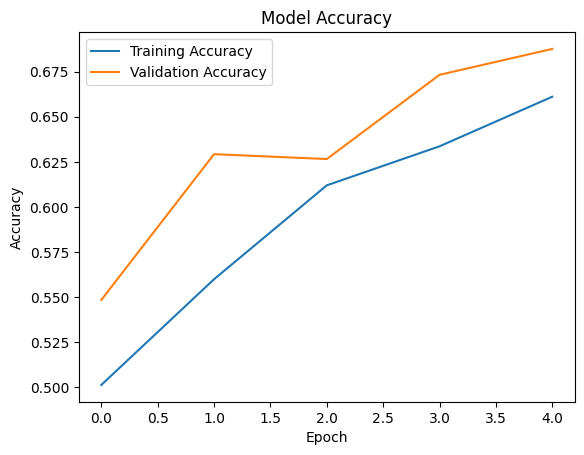

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

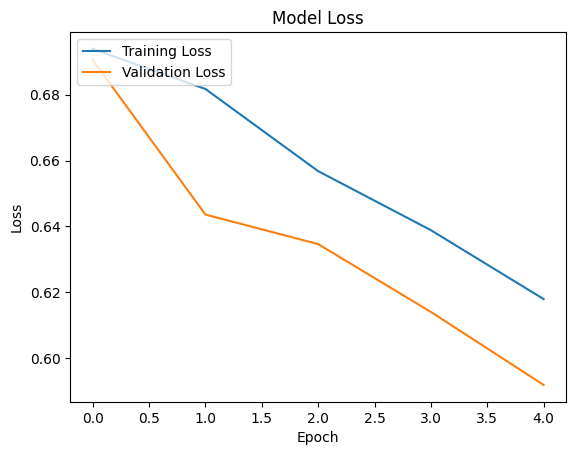

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()